# Predicting the onset of the communal conflict in the comming 12 months at admin2 level in Ethiopia
#### Y= cc_onset
#### X= 'fatalities', 'actor_state', 'actor_rebel_groups', 'actor_political_militias', 'actor_identity_militias', 'actor_civilians', 'actor_others', 'cc_onset', 'inflation_all', 'rainfall', 'rainfall_lag', 'temperature mean', 'btotl', 'maize_ETB_KG', 'teff_ETB_KG', 'wheat_ETB_KG', 'mean ndvi', 'fs_Crisis', 'fs_Emergency', 'fs_Famine', 'fs_Minimal', 'fs_Stressed'

#### Group variables: admin1, admin2, year, month

#### Functional form stracture objective Yt=X(t-1)+...+X(t-12)

#### where t is a month

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context("poster")

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (11,8)
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from merf import MERF
merf = MERF()

In [80]:
#url = 'https://data.kimetrica.com/dataset/4dbc3cc7-9474-49f2-bfd4-231e78401caa/resource/7423b71d-ce8c-437c-9fe6-2d9ba58d6155/download/dataset_communal_cnflict_model.csv'
df = pd.read_csv('/Users/yaredhurisa/Google Drive/Probability of conflict/indicators/eth_cc_final_dataset_monthly.csv')
list(df.columns)

['Unnamed: 0',
 'group',
 'date',
 'cc_onset',
 'fatalities',
 'cc_onset_1',
 'fatalities_1',
 'actor_state_1',
 'actor_rebel_groups_1',
 'actor_political_militias_1',
 'actor_identity_militias_1',
 'actor_civilians_1',
 'actor_others_1',
 'inflation_all_1',
 'rainfall_1',
 'temperature_1',
 'pop_1',
 'maize_kg_birr_1',
 'teff_kg_birr_1',
 'wheat_kg_birr_1',
 'ndvi_1',
 'fs_crisis_1',
 'df_emergency_1',
 'fs_famine_1',
 'fs_minimal_1',
 'fs_stressed_1',
 'cc_onset_2',
 'fatalities_2',
 'actor_state_2',
 'actor_rebel_groups_2',
 'actor_political_militias_2',
 'actor_identity_militias_2',
 'actor_civilians_2',
 'actor_others_2',
 'inflation_all_2',
 'rainfall_2',
 'temperature_2',
 'pop_2',
 'maize_kg_birr_2',
 'teff_kg_birr_2',
 'wheat_kg_birr_2',
 'ndvi_2',
 'fs_crisis_2',
 'df_emergency_2',
 'fs_famine_2',
 'fs_minimal_2',
 'fs_stressed_2',
 'cc_onset_3',
 'fatalities_3',
 'actor_state_3',
 'actor_rebel_groups_3',
 'actor_political_militias_3',
 'actor_identity_militias_3',
 'actor_ci

In [81]:
df.cc_onset = df.cc_onset.replace(0, -1)

In [82]:
#Training, and test 
start_date = "2009-12-01"
end_date = "2018-01-01"
mask = (df['date'] > start_date) & (df['date'] < end_date)
train1 = df.loc[mask]


start_date = "2017-12-01"
end_date = "2019-01-01"
mask = (df['date'] > start_date) & (df['date'] < end_date)
test1 = df.loc[mask]

train1

,Unnamed: 0,group,date,cc_onset,fatalities,cc_onset_1,fatalities_1,actor_state_1,actor_rebel_groups_1,actor_political_militias_1,...,pop_12,maize_kg_birr_12,teff_kg_birr_12,wheat_kg_birr_12,ndvi_12,fs_crisis_12,df_emergency_12,fs_famine_12,fs_minimal_12,fs_stressed_12
12,13,Addis Ababa_Addis Ababa,2010-01-01,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3089964.0,5.890955,8.229426,7.361024,132.890436,0.0,0.0,0.0,0.0,0.0
13,14,Addis Ababa_Addis Ababa,2011-01-01,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3177713.0,4.164861,8.292023,6.580821,134.059167,0.0,0.0,0.0,0.0,0.0
14,15,Addis Ababa_Addis Ababa,2012-01-01,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3268409.0,3.736111,7.441661,6.789736,132.349538,0.0,0.0,0.0,0.0,0.0
15,16,Addis Ababa_Addis Ababa,2013-01-01,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3362496.0,5.031727,6.632678,4.931552,128.659290,0.0,0.0,0.0,0.0,0.0
16,17,Addis Ababa_Addis Ababa,2014-01-01,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3460484.0,6.517361,13.442138,10.858605,128.996890,0.0,0.0,0.0,0.0,0.0
17,18,Addis Ababa_Addis Ababa,2015-01-01,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3562422.0,7.218056,13.373492,11.266562,128.941135,0.0,0.0,0.0,0.0,0.0
18,19,Addis Ababa_Addis Ababa,2016-01-01,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3668349.0,7.416667,13.580695,13.494405,128.740304,0.0,0.0,0.0,0.0,0.0
19,20,Addis Ababa_Addis Ababa,2017-01-01,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3778249.0,7.993806,14.281477,16.173609,130.998317,0.0,0.0,0.0,0.0,0.0
35,37,Addis Ababa_Addis Ababa,2010-02-01,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3089964.0,5.798036,7.887578,6.395091,132.233151,0.0,0.0,0.0,0.0,0.0
36,38,Addis Ababa_Addis Ababa,2011-02-01,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3177713.0,4.110278,8.129573,6.394587,132.482843,0.0,0.0,0.0,0.0,0.0


In [83]:
X_train = train1.drop(['Unnamed: 0', 'date', 'group','cc_onset'], axis=1)
X_test = test1.drop(['Unnamed: 0', 'date', 'group', 'cc_onset'], axis=1)

# Z_train is the design matrix
Z_train = np.ones((len(X_train), 1))
clusters_train = train1['group']
y_train = train1['cc_onset']

Z_test = np.ones((len(X_test), 1))
clusters_test = test1['group']
y_test = test1['cc_onset']

In [84]:
mrf = MERF(n_estimators=100, max_iterations=100)
merf.fit(X_train, Z_train, clusters_train, y_train)

INFO     [merf.py:250] GLL is -15625.810034524222 at iteration 1.
INFO     [merf.py:250] GLL is -15890.592113900198 at iteration 2.
INFO     [merf.py:250] GLL is -15889.695220333298 at iteration 3.
INFO     [merf.py:250] GLL is -15992.732087228726 at iteration 4.
INFO     [merf.py:250] GLL is -15954.219031257353 at iteration 5.
INFO     [merf.py:250] GLL is -15944.375442895343 at iteration 6.
INFO     [merf.py:250] GLL is -15909.937128595308 at iteration 7.
INFO     [merf.py:250] GLL is -15916.724291046678 at iteration 8.
INFO     [merf.py:250] GLL is -15966.498395196155 at iteration 9.
INFO     [merf.py:250] GLL is -15982.269669437548 at iteration 10.
INFO     [merf.py:250] GLL is -16018.416683081341 at iteration 11.
INFO     [merf.py:250] GLL is -15966.837658058608 at iteration 12.
INFO     [merf.py:250] GLL is -15871.077889473727 at iteration 13.
INFO     [merf.py:250] GLL is -15934.10730492751 at iteration 14.
INFO     [merf.py:250] GLL is -15991.546765872443 at iteration 15.
INFO 

Text(0.5, 0, 'Iteration')

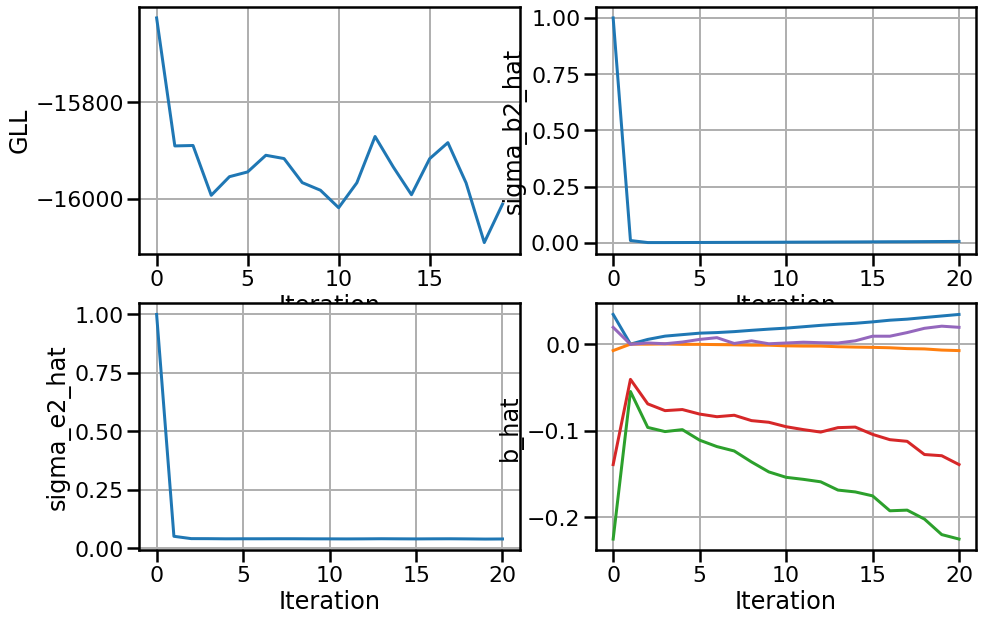

In [85]:
plt.figure(figsize=[15,10])
plt.subplot(221)
plt.plot(merf.gll_history)
plt.grid('on')
plt.ylabel('GLL')
plt.xlabel('Iteration')

plt.subplot(222)
D_hat_history = [x[0][0] for x in merf.D_hat_history]
plt.plot(D_hat_history)
plt.grid('on')
plt.ylabel('sigma_b2_hat')
plt.xlabel('Iteration')

plt.subplot(223)
plt.plot(merf.sigma2_hat_history)
plt.grid('on')
plt.ylabel('sigma_e2_hat')
plt.xlabel('Iteration')

plt.subplot(224)
b_df = pd.concat(merf.b_hat_history, axis=1)

b_df.columns = range(0, 21)


plt.plot(b_df.iloc[0])
plt.plot(b_df.iloc[20])
plt.plot(b_df.iloc[30])
plt.plot(b_df.iloc[40])
plt.plot(b_df.iloc[50])
#plt.plot(b_df.iloc[60])
plt.grid('on')
plt.ylabel('b_hat')
plt.xlabel('Iteration')


Text(0.5, 1.0, 'Distribution of b_is')

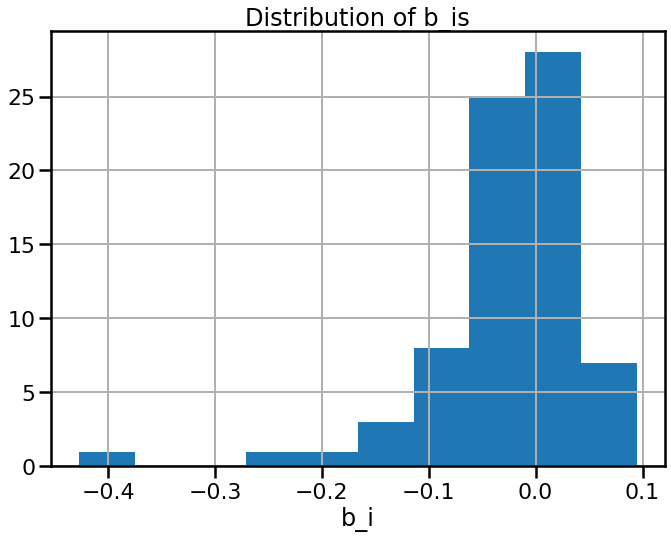

In [86]:
merf.trained_b.hist(bins=10)
plt.xlabel('b_i')
plt.title('Distribution of b_is')

In [155]:
y_hat_test_merf = merf.predict(X_test, Z_test, clusters_test)
assert len(y_hat_test_merf) == len(y_test)

In [156]:
eval_test_merf=pd.DataFrame({'prediction': y_hat_test_merf, 'target_variable': y_test})
print('r2 score of the model: ', r2_score(y_test, y_hat_test_merf)) 
print('mse of the model: ',mean_squared_error(y_test, y_hat_test_merf))
print('rmse of the model: ',np.sqrt(mean_squared_error(y_test, y_hat_test_merf)) )

r2 score of the model:  0.24508470861610976
mse of the model:  0.2447416564586672
rmse of the model:  0.49471371161376476


Text(0.5, 1.0, 'Predicted refugee flows and true values (MERF)')

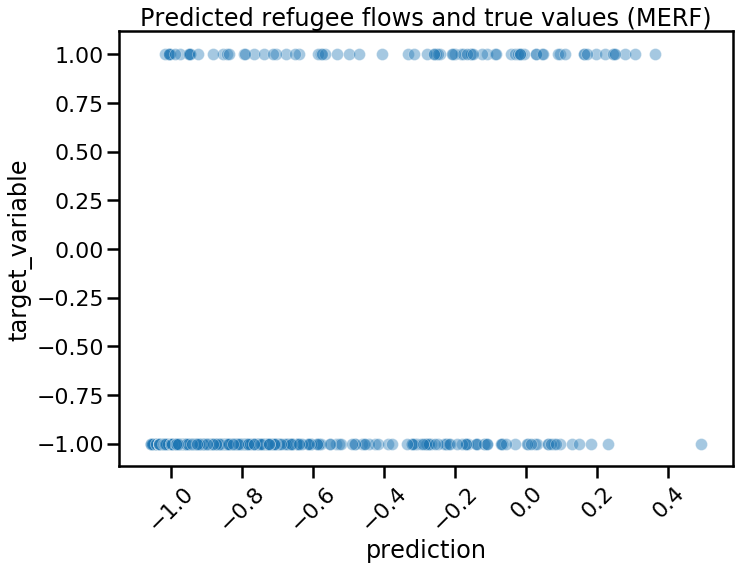

In [157]:
# plot the true value vs prediction
ax = sns.scatterplot(x="prediction", y="target_variable", data=eval_test_merf, alpha=0.4 )
plt.xticks(rotation=45)
plt.title('Predicted refugee flows and true values (MERF)')

In [158]:
merge_eval_merf=pd.concat([test, eval_test_merf], axis=1)

In [159]:
merge_eval_merf

,Unnamed: 0,cc_onset,fatalities,cc_onset_1,fatalities_1,actor_state_1,actor_rebel_groups_1,actor_political_militias_1,actor_identity_militias_1,actor_civilians_1,...,teff_kg_birr_12,wheat_kg_birr_12,ndvi_12,fs_crisis_12,df_emergency_12,fs_famine_12,fs_minimal_12,fs_stressed_12,prediction,target_variable
20,21,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.196777,14.532131,128.934691,0.0,0.0,0.0,0.0,0.0,-0.822004,-1.0
43,45,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.365806,14.606255,128.334243,0.0,0.0,0.0,0.0,0.0,-0.673490,-1.0
66,69,-1.0,13.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,14.575213,14.786679,128.967035,0.0,0.0,0.0,0.0,0.0,-0.308136,-1.0
89,93,-1.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,...,14.711928,15.082420,129.551074,0.0,0.0,0.0,0.0,0.0,-0.820836,-1.0
112,117,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.900207,15.649164,130.757934,0.0,0.0,0.0,0.0,0.0,-0.820660,-1.0
135,141,-1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.834793,16.010007,129.985287,0.0,0.0,0.0,0.0,0.0,-0.226937,-1.0
158,165,-1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,20.884960,26.894569,127.797110,0.0,0.0,0.0,0.0,0.0,-0.584018,-1.0
181,189,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,21.001567,27.697458,125.897517,0.0,0.0,0.0,0.0,0.0,-0.978368,-1.0
204,213,1.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.034844,25.388136,130.078042,0.0,0.0,0.0,0.0,0.0,-0.244320,1.0
227,237,-1.0,4.0,1.0,29.0,1.0,0.0,0.0,0.0,1.0,...,13.331263,14.558258,140.555352,0.0,0.0,0.0,0.0,0.0,-0.168795,-1.0


In [162]:
merge_eval_merf['prediction']=merge_eval_merf.loc[merge_eval_merf['prediction'] >= 0, 'prediction'] = 1
merge_eval_merf['prediction']=merge_eval_merf.loc[merge_eval_merf['prediction'] < 0, 'prediction'] = -1

In [163]:
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
print(classification_report(merge_eval_merf.cc_onset, merge_eval_merf.prediction))

              precision    recall  f1-score   support

        -1.0       0.91      1.00      0.95       809
         1.0       0.00      0.00      0.00        79

    accuracy                           0.91       888
   macro avg       0.46      0.50      0.48       888
weighted avg       0.83      0.91      0.87       888

